In [4]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_dir = os.path.expanduser("~/data")
pd.__version__
%matplotlib inline
sales = pd.read_csv(os.path.join(data_dir,"sample-salesv2.csv"), parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [5]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [6]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

In [7]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

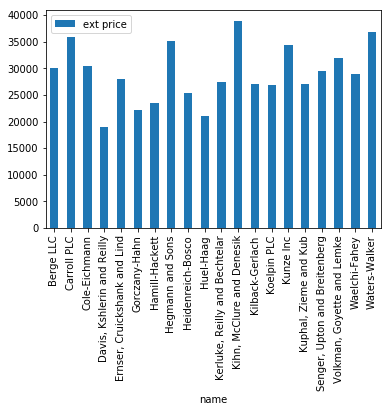

In [12]:
customers = sales[['name','ext price','date']]
#customers.head()
customer_group = customers.groupby('name')
customer_group.size()
sales_totals = customer_group.sum()
sales_totals.sort_values(by='ext price').head()
my_plot = sales_totals.plot(kind='bar')


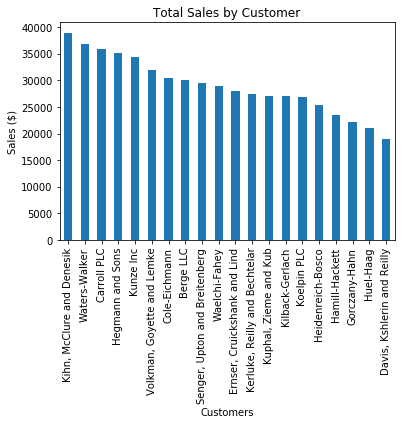

In [13]:
my_plot = sales_totals.sort_values(by='ext price', ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

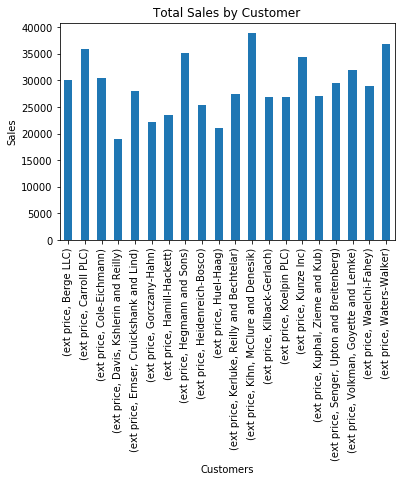

In [15]:
category_group=customers.groupby(['name']).sum()
category_group.head()
category_group.unstack().head()
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer")
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")

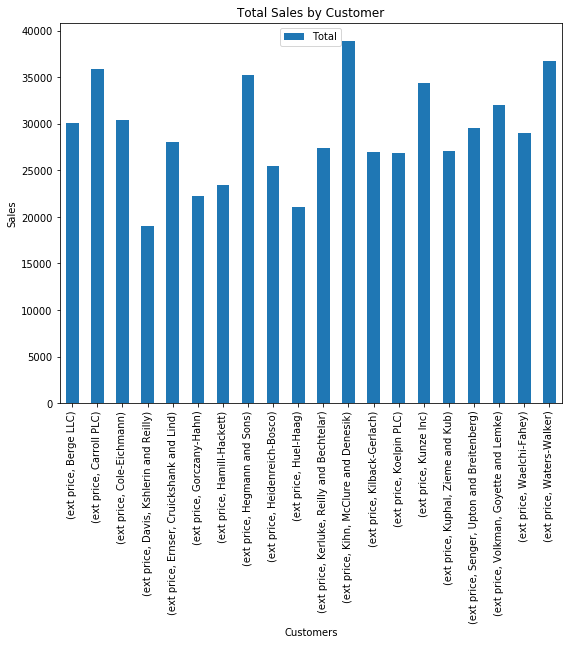

In [16]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer",figsize=(9, 7))
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales")
my_plot.legend(["Total","Belts","Shirts","Shoes"], loc=9,ncol=4)

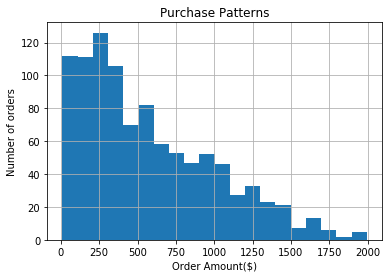

In [17]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()
purchase_plot = purchase_patterns['ext price'].hist(bins=20)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("Number of orders")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


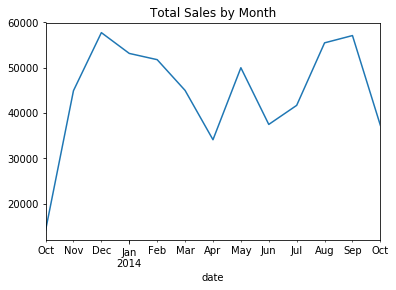

In [18]:
purchase_patterns = sales[['ext price','date']]
purchase_patterns.head()
purchase_patterns = purchase_patterns.set_index('date')
purchase_patterns.head()
purchase_patterns.resample('M',how=sum)
purchase_plot = purchase_patterns.resample('M',how=sum).plot(title="Total Sales by Month",legend=None)
#fig = purchase_plot.get_figure()
#fig.savefig("total-sales.png")
